# Проектная работа : Планирование рекламной компании

## Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, *Xbox* или *PlayStation*). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура *ESRB (Entertainment Software Rating Board)* — это ассоциация, определяющая возрастной рейтинг компьютерных игр. *ESRB* оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Описание данных

- *Name* — название игры
- *Platform* — платформа
- *Year_of_Release* — год выпуска
- *Genre* — жанр игры
- *NA_sales —* продажи в Северной Америке (миллионы проданных копий)
- *EU_sales* — продажи в Европе (миллионы проданных копий)
- *JP_sales* — продажи в Японии (миллионы проданных копий)
- *Other_sales —* продажи в других странах (миллионы проданных копий)
- *Critic_Score* — оценка критиков (максимум 100)
- *User_Score* — оценка пользователей (максимум 10)
- *Rating* — рейтинг от организации *ESRB* (англ. *Entertainment Software Rating Board).* Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

## 1. Изучение общей информации

In [1]:
# импортирую необходимые библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
!pip install missingno
 
import missingno as msno

In [2]:
# считываю датасет
data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
# первое знакомство с таблицей
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
# общая информация о количестве строк, типах данных, названиях столбцов
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# проверяю количество пропусков
pd.DataFrame(round((data.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
Name,0.010000
Platform,0.000000
Year_of_Release,1.610000
Genre,0.010000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Critic_Score,51.320000
User_Score,40.090000


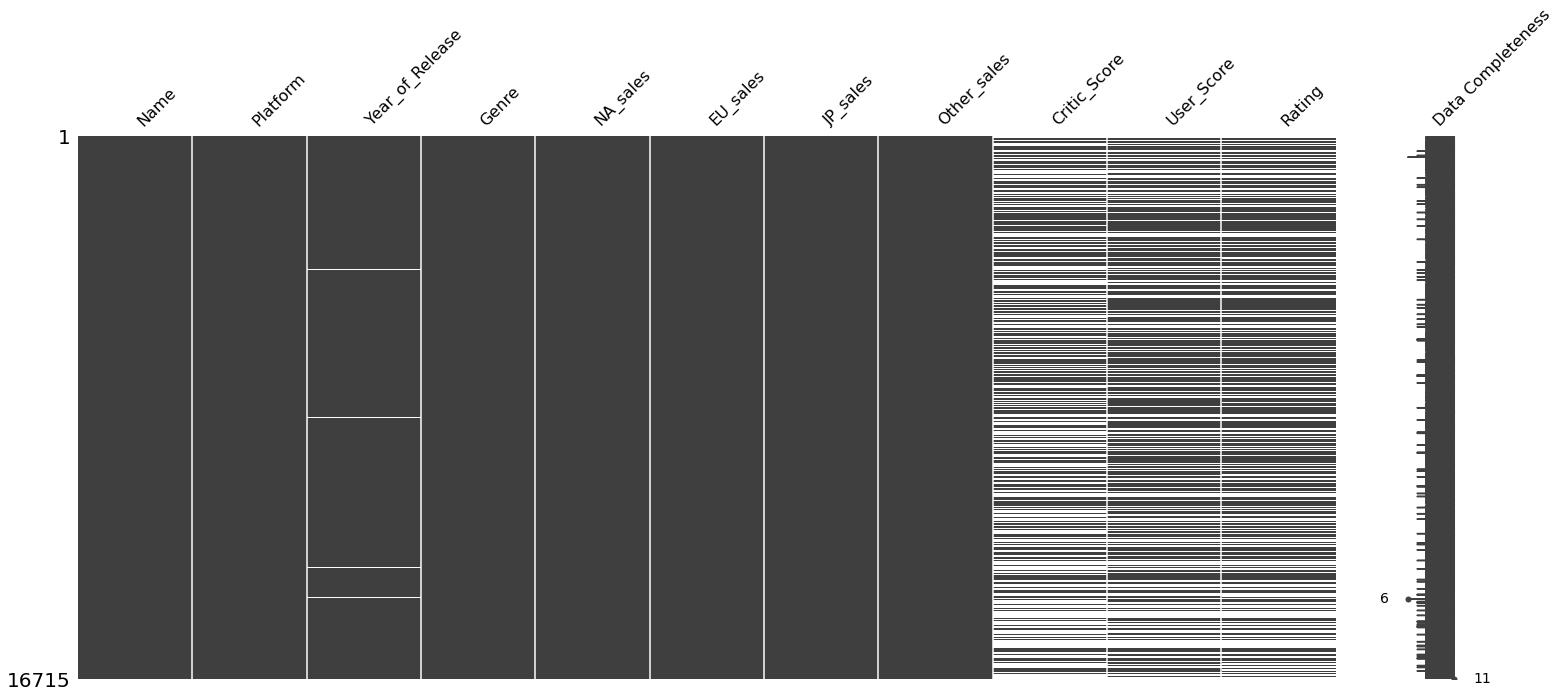

In [8]:
# дополнительно исследую пропуски данных
msno.matrix(data, labels=True);

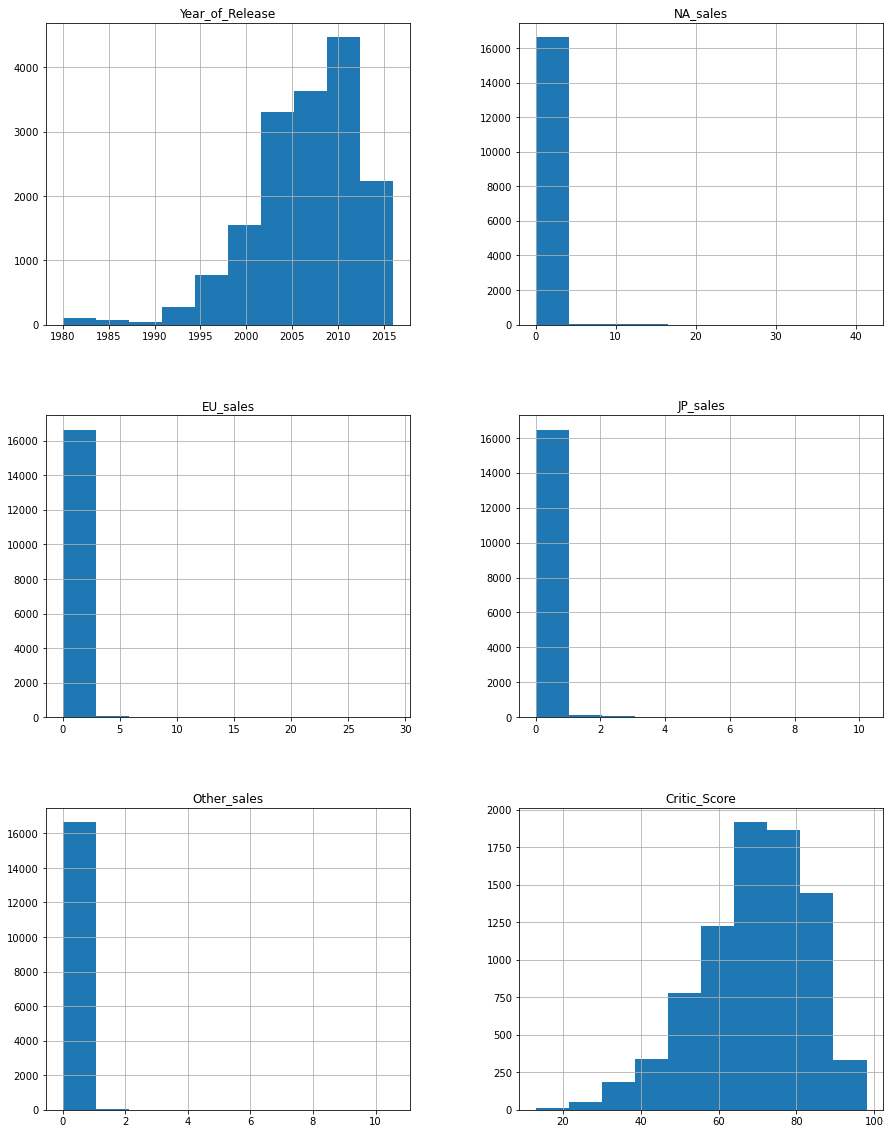

In [6]:
# смотрю распределение по столбцам
data.hist(figsize=(15, 20));

**Краткие итоги:**
- первое знакомство показало, что у нас сравнительно небольшая таблица на 16715 строк
- в таблице есть много пропусков в разделах `Critic_Score`, `User_Score` и `Rating`
- распределение не показало столбец `User_Score`, который должен иметь числовой рейтинг, но имеет тип данных `object`. Это необходимо будет обработать отдельно.
- необходимо будет привести в единый регистр названия столбцов и по возможности обработать пропуски. Для удобства дальнейшего анализа преобразовать  в некоторых столбцах тип данных. В первую очередь `User_Score`.

## 2. Предобработка данных

### 2.1.Приведение к нижнему регистру названия столбцов

In [7]:
# привожу к нижнему регистру названия столбцов
data.columns = data.columns.str.lower()

### 2.2.Обработка пропусков

In [8]:
# пропуски в названии игры и годе выпуска нет возможности заполнить, решаю удалить эти строки
data = data.dropna(subset=['name', 'year_of_release'])

Пропуски в оценках игры и рейтинге я хотел обработать на основании того, что одна и та же игра выпускалась на разных платформах и можно было бы взять информацию оттуда. Обработав все названия вывожу несколько игр из списка для примера.

In [9]:
# проверяю свою гипотезу по уникальным именам игры
# знаю, что цикл не очень хорошо дружит с датасетом (это заметно по времени выполнения кода)
# но по другому я не нашел как сделать,и я на всякий случай закомментирую этот код
# а по полученным из него данным сформулирую ниже выводы

#unique_names = []
#for single in data['name']:
#    if len(data[data['name'] == single]) >= 2:
#        if single not in unique_names:
#            unique_names.append(single)
#
#print(*unique_names[50 : 70], sep='\n')

In [10]:
data[data['name'] == "Final Fantasy III"]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
388,Final Fantasy III,SNES,1994.0,Role-Playing,0.86,0.00,2.55,0.02,NaN,NaN,NaN
802,Final Fantasy III,DS,2006.0,Role-Playing,0.89,0.04,1.07,0.09,77.0,7.1,E10+
1383,Final Fantasy III,NES,1990.0,Role-Playing,0.00,0.00,1.39,0.01,NaN,NaN,NaN
10024,Final Fantasy III,PSP,2012.0,Role-Playing,0.00,0.00,0.11,0.00,NaN,8.9,T


In [11]:
data[data['name'] == "Tomb Raider"]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
229,Tomb Raider,PS,1996.0,Action,2.29,1.97,0.13,0.24,91.0,8.6,T
2014,Tomb Raider,PC,1996.0,Action,0.96,0.07,0.00,0.00,86.0,8.5,M


In [12]:
data[data['name'] == "NBA 2K16"]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
314,NBA 2K16,PS4,2015.0,Sports,2.49,0.66,0.03,0.69,87.0,6.7,E10+
680,NBA 2K16,XOne,2015.0,Sports,1.95,0.15,0.00,0.24,86.0,6.2,E10+
2183,NBA 2K16,X360,2015.0,Sports,0.79,0.05,0.00,0.10,NaN,3.2,E
2780,NBA 2K16,PS3,2015.0,Sports,0.45,0.12,0.03,0.13,NaN,4.6,E
10688,NBA 2K16,PC,2015.0,Sports,0.03,0.06,0.00,0.01,NaN,5.7,E10+


Как видно из примеров одна и та же игра в зависимости от платформы или года выпуска имеет разные оценки и рейтинг. Поэтому заменить подходящими значениями не представляется возможным.

In [13]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Столбец `user_score` имеет тип данных `object`, из-за наличия в нем значений `tbd`, которые имеет строковое значение и из-за которого остальные цифры принимают такое же значение. Нам этот столбик понадобится для дальнейших расчетов, поэтому его необходимо обработать.
`TBD` - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято.

In [14]:
# ставлю заглушку вместо значения `tbd`, её будет необходимо учитывать при анализе
data.loc[data['user_score'] == 'tbd', 'user_score'] = -1

In [15]:
# в дальнейшем нам необходимо будет анализировать рейтинги игры, посчитал нужным заполнить пропуски, чтобы не исказить данные
data['rating'] = data['rating'].fillna('no_rating')

In [16]:
# обновляю индексы для таблицы после удаления строк
data = data.reset_index()

### 2.3. Изменение типа данных

In [17]:
# привожу к цельночисленному значению,т.к. дата имеет знаечение только года
data['year_of_release'] = data['year_of_release'].astype(int)

In [18]:
# меняю строковое значение на вещественное, стало возможным после замены значения 'tbd' 
data['user_score'] = data['user_score'].astype(float)

### 2.4. Создание дополнительных столбцов

In [19]:
# создаю столбец суммарных продажи во всех регионах
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

### 2.5. Выводы по предобработке данных

In [20]:
# проверяю внесенные изменения
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16444 non-null  int64  
 1   name             16444 non-null  object 
 2   platform         16444 non-null  object 
 3   year_of_release  16444 non-null  int32  
 4   genre            16444 non-null  object 
 5   na_sales         16444 non-null  float64
 6   eu_sales         16444 non-null  float64
 7   jp_sales         16444 non-null  float64
 8   other_sales      16444 non-null  float64
 9   critic_score     7983 non-null   float64
 10  user_score       9839 non-null   float64
 11  rating           16444 non-null  object 
 12  total_sales      16444 non-null  float64
dtypes: float64(7), int32(1), int64(1), object(4)
memory usage: 1.6+ MB


**Небольшие выводы по предобработке данных:**
- 40-50% пропусков в столбцах `Critic_Score` и `User_Score` скорее всего обусловлены тем, что данные взяты за большой период времени и тогда могло не существовать оценочной системы, либо она видоизменялась и не подходит для современных суждений
- пропуски в столбце `Rating` могут быть обусловены тем, что рейтинг играм присваивался другими системами, а для этих таблицы взята только система рейтинговой ассоциации `ESRB`
- пропуски в названии игры, жанре и в годе выпуска возможно вызваны сбоем при считывании данных
- после предобработки я удалил меньше 2% процентов данных, из-за критически важных пропусков в них
- все названия столбцов привел в нужный регистр
- поставил две заглушки в столбце `user_score` вместо `tbd` теперь стоит значение `-1`, а в столбце `rating` вместо пропусков значение `no_rating`. Все это необходимо учитывать при дальнейшем анализе.
- столбец `year_of_release` привел к цельночисленному типу данных для удобства восприятия, а `user_score` к вещественному, т.к. до этого были строковые значения
- добавил столбец `total_sales` который понадобится для дальнейшего анализа.

## 3. Исследовательский анализ данных

### 3.1. Анализ количества игр, которые выпускались в разные годы

In [21]:
# строю сводную таблицу, которая покажет распределения количества выпущенных игр по годам
games_per_year = data.pivot_table(index='year_of_release', 
                                  values='name', 
                                  aggfunc='count'
                                 )
games_per_year = games_per_year.reset_index()
games_per_year.columns = ['Год релиза', 
                          'Количество выпущенных игр'
                         ]
games_per_year

,Год релиза,Количество выпущенных игр
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


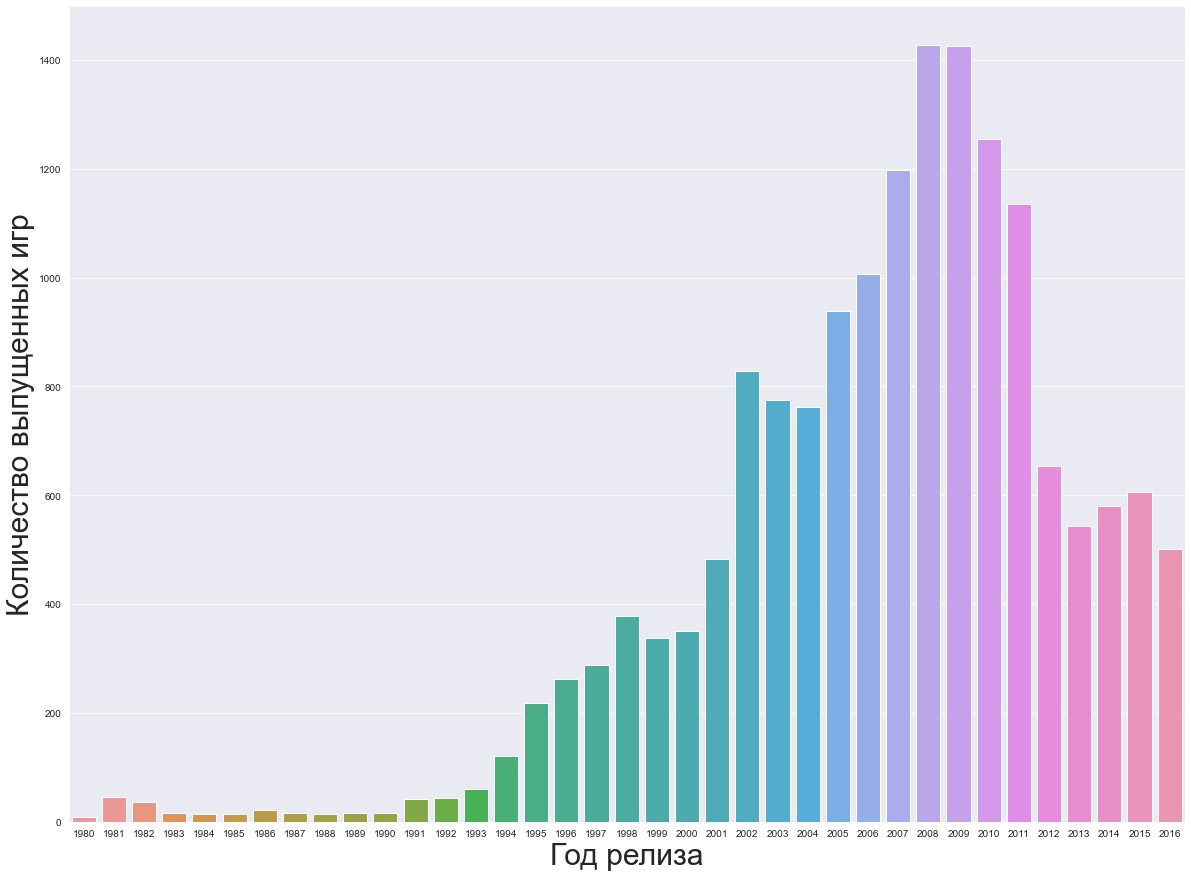

In [22]:
# на основании таблицы строю для наглядности график
plt.figure(figsize=(20,15))
sns.set_style('darkgrid')
plt.rc('axes', labelsize=30)
sns.barplot(x=games_per_year['Год релиза'], 
            y=games_per_year['Количество выпущенных игр']
           );

Как видно из графика до 1994 года игр выпускалось немного, что связано с низким уровнем технологий в тот промежуток времени. В связи с этим анализировать данные до 1994-1995 года не имеет смысла в виду малой выборки. С 1994 года идет рост количества игр, одновременно с этим растет количество платформ, на которых их можно выпустить. Пиком этого процесса стал 2008-2009. Дальше идет значительный спад, что скорее связано с тем, что игры выпускаются только для самых популярных платформ. 

### 3.2. Анализ продаж по платформам

In [23]:
# строю сводную таблицу для 10 платформ с наиболшим количесвтом продаж
sales_best = data.pivot_table(index='platform', 
                              values='total_sales', 
                              aggfunc='sum'
                             )
sales_best = sales_best.reset_index()
sales_best.columns = ['platform', 'total_sales']
sales_best_ten = sales_best.sort_values('total_sales', ascending=False).head(10)
sales_best_ten

,platform,total_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


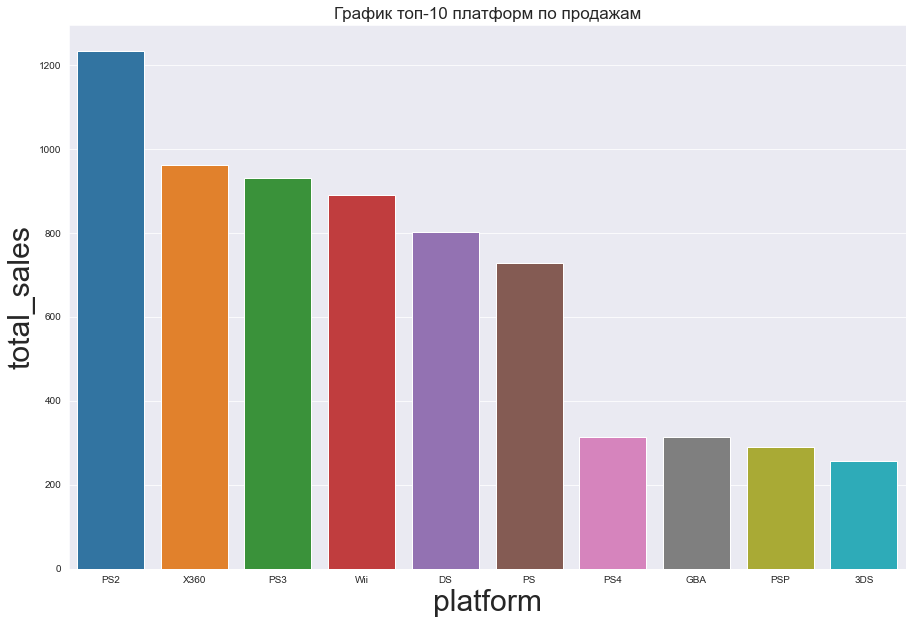

In [24]:
# отображаю результат графически
plt.figure(figsize=(15,10))
plt.rc('axes', labelsize=30)
plt.title('График топ-10 платформ по продажам', 
          fontsize=17
         )
sns.barplot(x=sales_best_ten['platform'], 
            y=sales_best_ten['total_sales']
           );

In [25]:
# создаю список топ-10 платформ по продажам
ten_platform = []
for i in sales_best_ten['platform']:
    ten_platform.append(i)

In [26]:
# делаю распределение продаж топ-10 платформ по годам
data_ten_platform = data.query('platform == @ten_platform')
data_ten_platform_pivot = data_ten_platform.pivot_table(index=['platform', 'year_of_release'],
                                                        values='total_sales', 
                                                        aggfunc='sum'
                                                       )
data_ten_platform_pivot =  data_ten_platform_pivot.reset_index()
data_ten_platform_pivot.columns = ['platform', 
                                   'year_of_release',
                                   'total_sales'
                                  ]

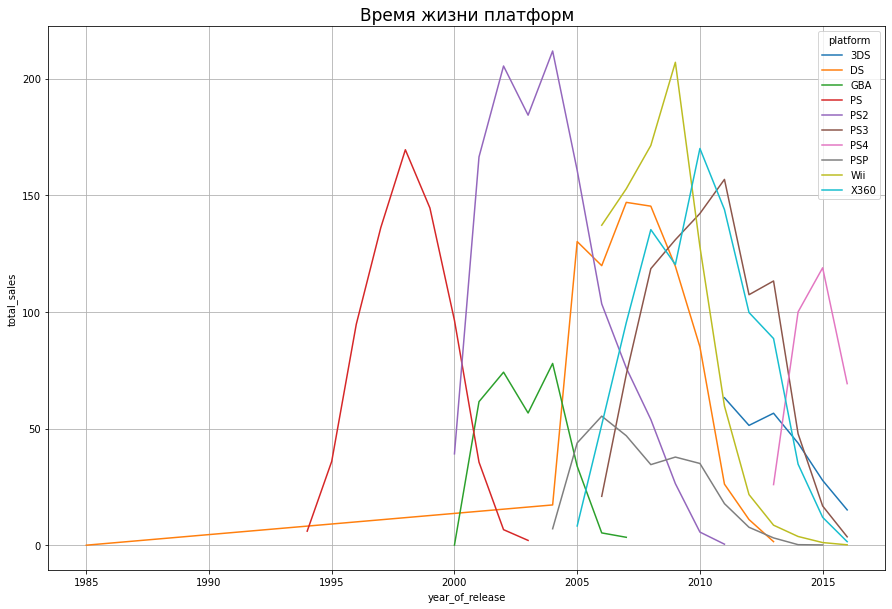

In [27]:
# на основании сводной таблицы строю график времени жизни топ-10 платформ
plt.figure(figsize=(15,10))
plt.style.use('default')
plt.grid()
plt.rc('axes', labelsize=15)
plt.title('Время жизни платформ', fontsize=17)
sns.lineplot(data=data_ten_platform_pivot, 
             x="year_of_release", 
             y="total_sales", 
             hue='platform'
            );

Из полученных данных видно, что наибольшее количество продаж по всем платформам у `PS2`, достаточно близко ее преемница `PS3` и популярная `X360`.

Согласно графику время жизни платформ составляет 6-11 лет. Отдельно стоит обратить внимание на платформу `DS`, она просуществовала больше 25 лет.

### 3.3. Анализ данных актуального периода

#### 3.3.1. Выбор актуального периода

В соответствии с полученными выше данными, я определяю актуальный период за 2013-2015 года. На графике распределения видно, что с 2013 года начинается новый этап роста продаж, который можно связать с появлением новых платформ и технических возможностей для выпуска новых игр. Данные за 2016 год я брать не стал, т.к. они скорее всего неполные и исказят анализ.

In [28]:
# отбираю данные за актуальный период
data_actual_period = data.query('year_of_release == [2013, 2014, 2015,]')

#### 3.3.2. Распределение продаж по платформам

In [29]:
# создаю таблицу распрделения по продаж по платформам
data_actual_period_pivot = data_actual_period.pivot_table(index=['platform', 'year_of_release'], 
                                                          values='total_sales', 
                                                          aggfunc='sum'
                                                         )
display(data_actual_period_pivot)
data_actual_period_pivot = data_actual_period_pivot.reset_index()
data_actual_period_pivot.columns = ['platform', 
                                    'year_of_release',
                                    'total_sales'
                                   ]

total_sales
platform year_of_release             
3DS      2013                   56.57
         2014                   43.76
         2015                   27.78
DS       2013                    1.54
PC       2013                   12.38
         2014                   13.28
         2015                    8.52
PS3      2013                  113.25
         2014                   47.76
         2015                   16.82
PS4      2013                   25.99
         2014                  100.00
         2015                  118.90
PSP      2013                    3.14
         2014                    0.24
         2015                    0.12
PSV      2013                   10.59
         2014                   11.90
         2015                    6.25
Wii      2013                    8.59
         2014                    3.75
         2015                    1.14
WiiU     2013                   21.65
         2014                   22.03
         2015                   16.35
X360     2013                   88.58
         2014                   34.74
         2015                   11.96
XOne     2013                   18.96
         2014                   54.07
         2015                   60.14

In [30]:
# отображаю платформы с наибольшим количеством продаж
data_actual_period_pivot.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS4     244.89
PS3     177.83
X360    135.28
XOne    133.17
3DS     128.11
WiiU     60.03
PC       34.18
PSV      28.74
Wii      13.48
PSP       3.50
DS        1.54
Name: total_sales, dtype: float64

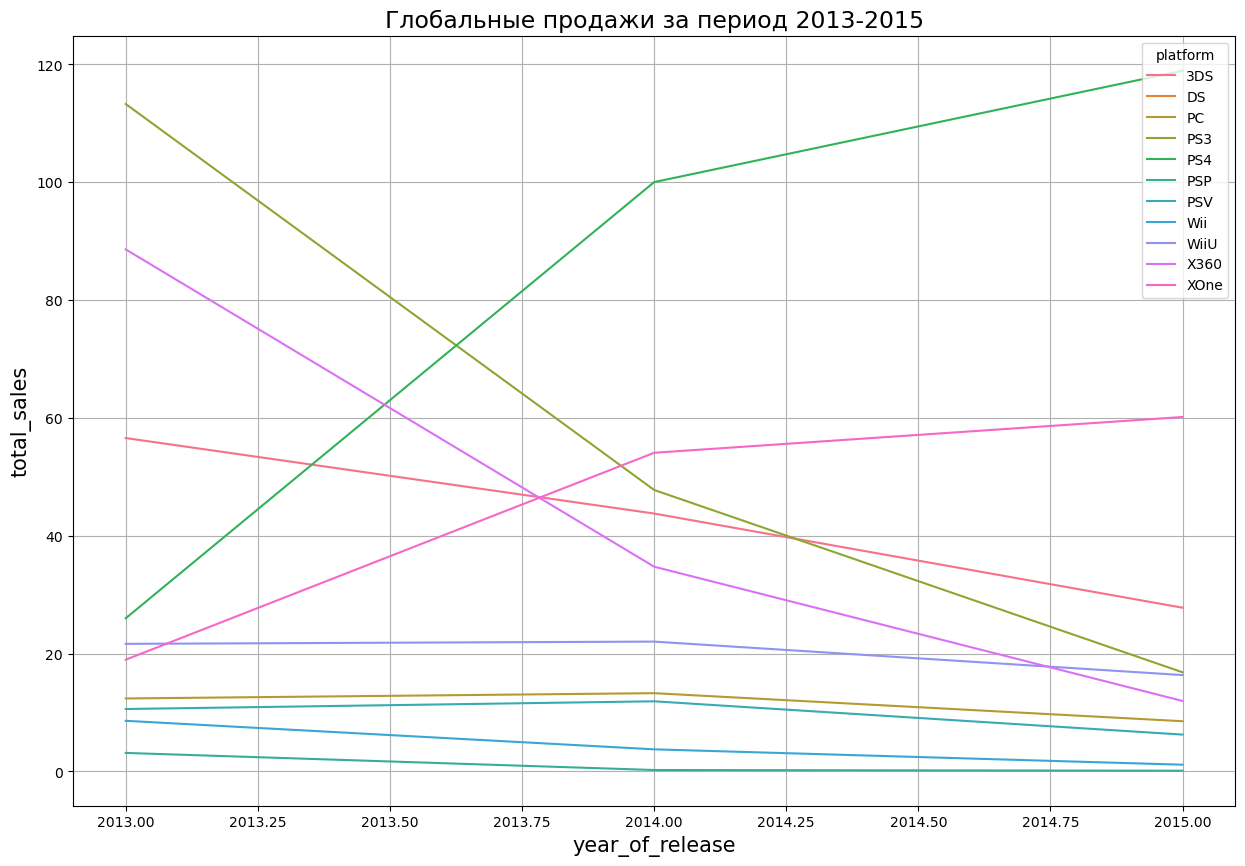

In [31]:
# строю график продаж по платформам на основании полученной выше таблицы
plt.figure(figsize=(15,10))
plt.grid()
plt.style.use('default')
plt.rc('axes', labelsize=15)
plt.title('Глобальные продажи за период 2013-2015', fontsize=17)
sns.lineplot(data=data_actual_period_pivot, 
             x='year_of_release', 
             y='total_sales', 
             hue='platform'
            );

По продажам лидирует `PS4`, следом идут наиболее популярные `PS3` , `XOne`, `X360`. Из графика видно что при падении продаж платформы `PS3` с такой же равномерностью растет ее преемница `PS4`, таким образом отображается своеобразный переход со старой платформы на новую. Такая же закономерность наблюдается и  платформами `XOne` и `X360`. Поэтому потенциальный рост у `PS4` и у `XOne`. Окончательно отмирают `DS` и `PSP`, сильный упадок продаж и скорее всего отмирание платформы `3DS`. В перманентном падении продажи для `PC`, но в связи с технологичным скачком на этой платформе возможен в дальнейшем рост, т.к. рынок `PC` находится в постоянном развитии.

#### 3.3.3. Построение 'ящика с усами'

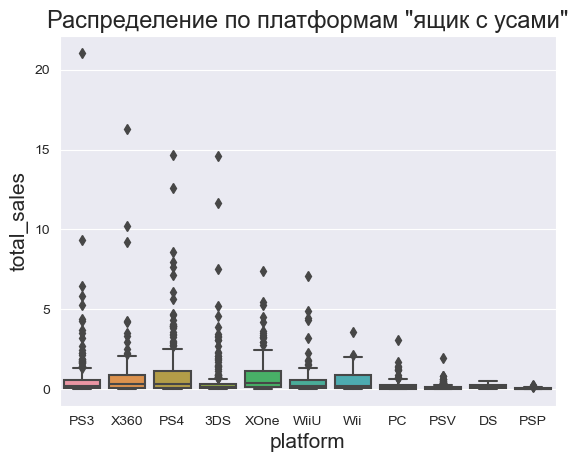

In [32]:
# строй boxplot() с распределением по платформам
sns.set_style('darkgrid')
plt.title('Распределение по платформам "ящик с усами"', fontsize=17)
sns.boxplot(data=data_actual_period, 
            x='platform', 
            y='total_sales'
           );

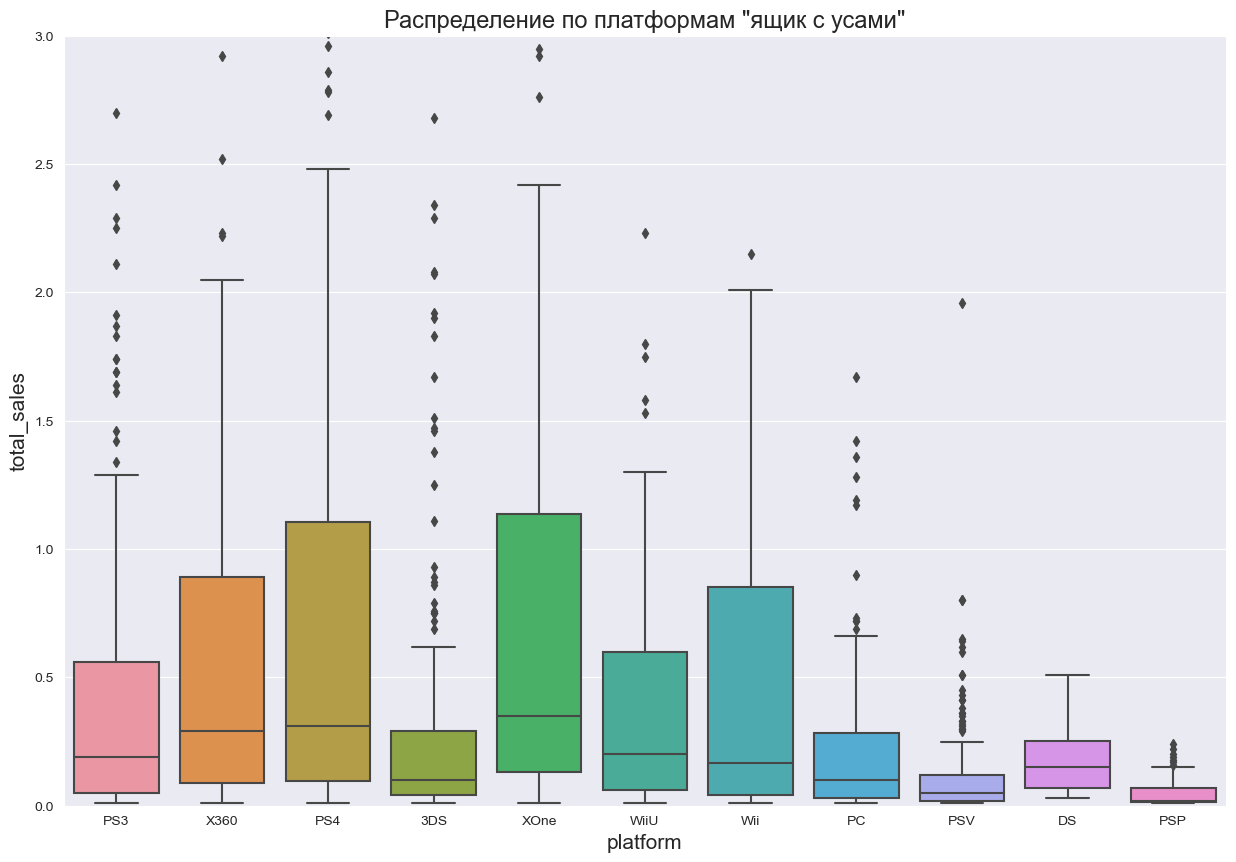

In [33]:
# укрупняю график
sns.set_style('darkgrid')
plt.figure(figsize=(15,10))
plt.ylim(0,3)
plt.title('Распределение по платформам "ящик с усами"', fontsize=17)
sns.boxplot(data=data_actual_period, 
            x='platform', 
            y='total_sales'
           );

Этот график подтверждает, что потенциал роста у двух новых на тот момент платформ `PS4` и `XOne`. Также в топе их версии предыдущего поколения `PS3` и `X360`. Здесь можно видеть,что много продаж у `Wii` и `WiiU`, но если смотреть на более крупный график, то видно что у `PS3`, `PS4` и `XOne` больше дорогих игр, которые определяются тут как аномалии. Если посмотреть на медианы продаж, то лидерами продаж являются `PS4` и `XOne`.

#### 3.3.4. Влияние на продажи внутри одной популярной платформы

Для этого анализа я решил взять платформу `PS4`, у нее больше всего продаж(в абсолютном значении), один из лидеров по медианному значению и по потенциалу дальнейшего роста.

In [34]:
# делаю срез данных по выбранной платформе
data_actual_ps4 = data_actual_period.query('platform == "PS4"')

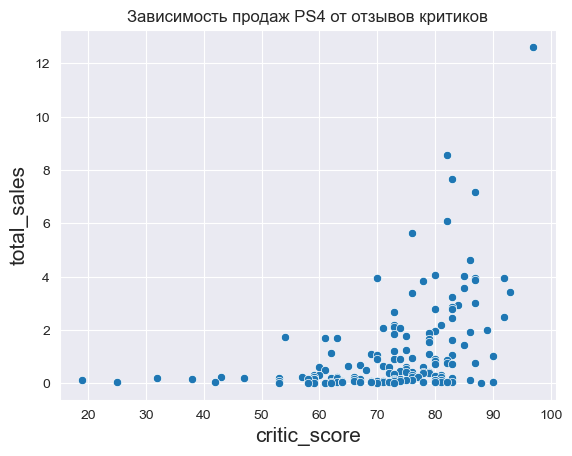

Корреляция продаж с отзывами критиков: 0.4318482049982005


In [35]:
# нахожу корреляцию и график зависимости продаж внутри выбранной платформы в зависимости от отзывов критиков
sns.scatterplot(x='critic_score', 
                y='total_sales', 
                data=data_actual_ps4
               )
plt.title('Зависимость продаж PS4 от отзывов критиков')
plt.show()
print('Корреляция продаж с отзывами критиков:',
      data_actual_ps4['total_sales'].corr(data_actual_ps4['critic_score'])
     )

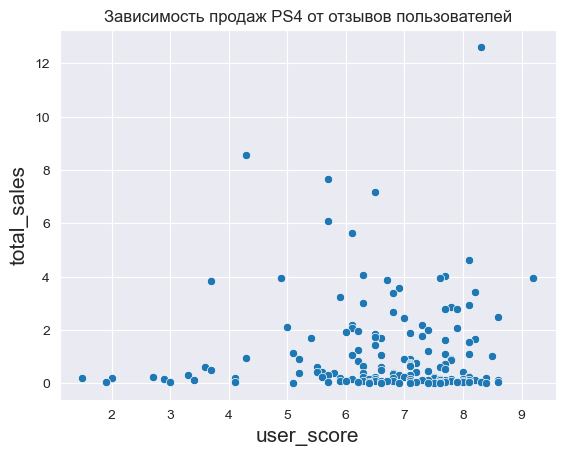

Корреляция продаж с отзывами пользователей: 0.024230832360622553


In [36]:
# нахожу корреляцию и график зависимости продаж внутри выбранной платформы в зависимости от отзывов пользователей
data_actual_ps4 = data_actual_period.query('platform == "PS4" and user_score != -1')
sns.scatterplot(x='user_score', 
                y='total_sales', 
                data=data_actual_ps4
               )
plt.title('Зависимость продаж PS4 от отзывов пользователей')
plt.show()
print('Корреляция продаж с отзывами пользователей:', 
      data_actual_ps4['total_sales'].corr(data_actual_ps4['user_score'])
     )

Исходя из графиков можно сказать, что есть средняя зависимость продаж игр внутри платформы `PS4` от отзывов критиков. Отзывы пользователей оказывают влияние сильно ниже среднего.

#### 3.3.5. Соотношение продаж по другим платформам

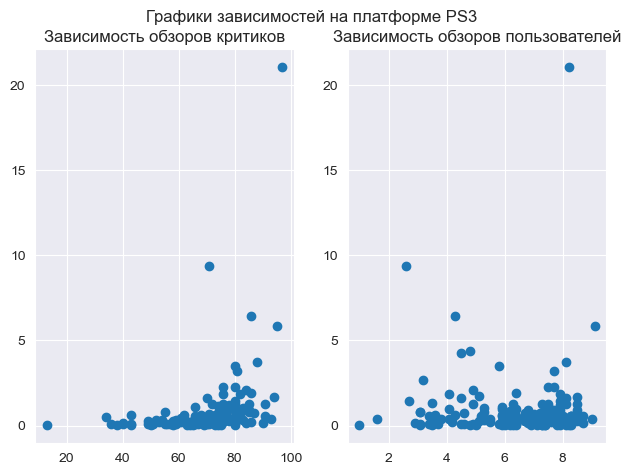

Корреляция продаж с отзывами критиков: 0.3342853393371919
Корреляция продаж с отзывами пользователей: -0.01633272834351343


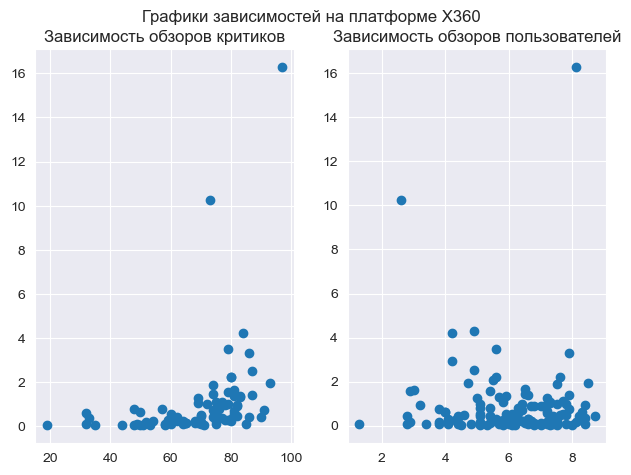

Корреляция продаж с отзывами критиков: 0.3503445460228664
Корреляция продаж с отзывами пользователей: -0.034562454100238206


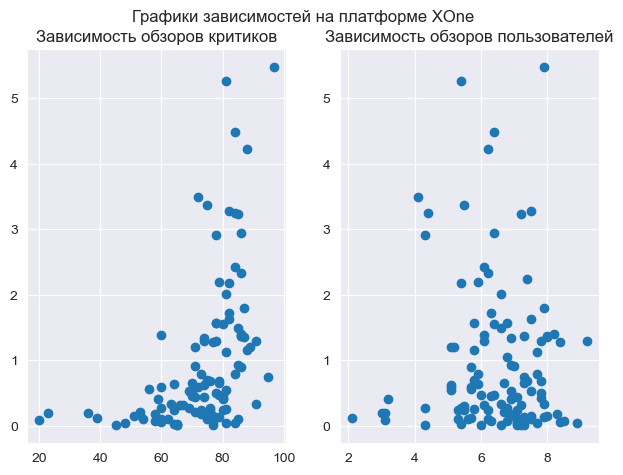

Корреляция продаж с отзывами критиков: 0.4593845680707106
Корреляция продаж с отзывами пользователей: -0.03926828544552199


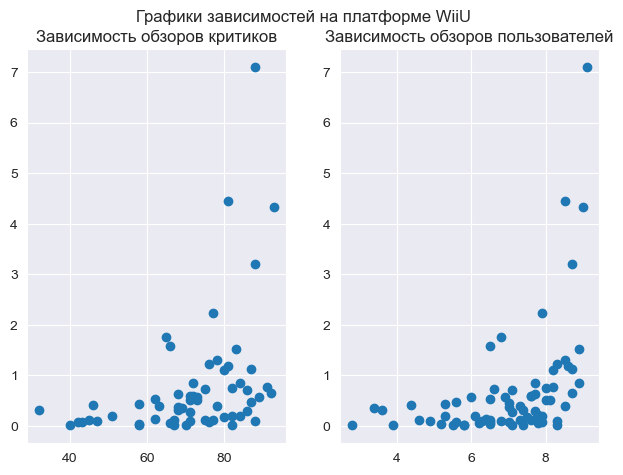

Корреляция продаж с отзывами критиков: 0.3839512824903964
Корреляция продаж с отзывами пользователей: 0.4334762114736929


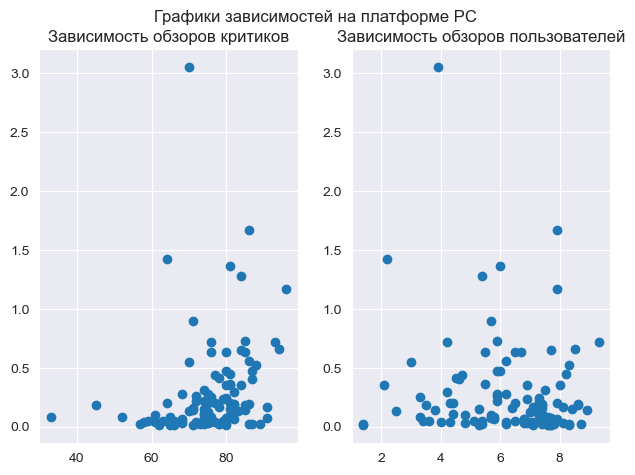

Корреляция продаж с отзывами критиков: 0.21640320746137406
Корреляция продаж с отзывами пользователей: -0.12942822535329046


In [37]:
# я выбрал несколько платформ которые показывали хорошие продажи согласно графику 'ящик с усами'
# построил для каждого из них корреляции с отзывами пользователей и критиков
for species in ['PS3', 
                'X360', 
                'XOne', 
                'WiiU', 
                'PC'
               ]:
    tbd_yes = data_actual_period.query('platform == @species')
    tbd_no = data_actual_period.query('platform == @species and user_score != -1')
    x1 = tbd_yes['critic_score']
    y1 = tbd_yes['total_sales']
    x2 = tbd_no['user_score']
    y2 = tbd_no['total_sales']
    fig,(ax1, ax2) = plt.subplots(1,2);
    fig.suptitle('Графики зависимостей на платформе ' + species);
    fig.tight_layout();
    ax1.scatter(x1, y1);
    ax2.scatter(x2, y2);
    ax1.set_title('Зависимость обзоров критиков');
    ax2.set_title('Зависимость обзоров пользователей');
    plt.show();
    print('Корреляция продаж с отзывами критиков:',
          tbd_yes['total_sales'].corr(tbd_yes['critic_score'])
         )
    print('Корреляция продаж с отзывами пользователей:', 
          tbd_no['total_sales'].corr(tbd_no['user_score'])
         )

У лидирующих платформ на рынке `PS3`,`X360` и `XOne` наблюдается схожая с платформой `PS4` зависимость продаж от отзывов критиков и пользователей, где есть средняя зависимость, в которой с увеличением оценки критиков увеличивается объем продаж. Оценка пользователей влияния не оказывает. Для контраста на платформе `WiiU` наблюдается зависимость продаж и от оценки пользователей и от оценки критиков, причем пользователи оказывают большее влияние. Для рынка `PC` противоположная ситуация, на продажи в котором почти нет влияние оценок.

#### 3.3.6. Распределение игр по жанрам

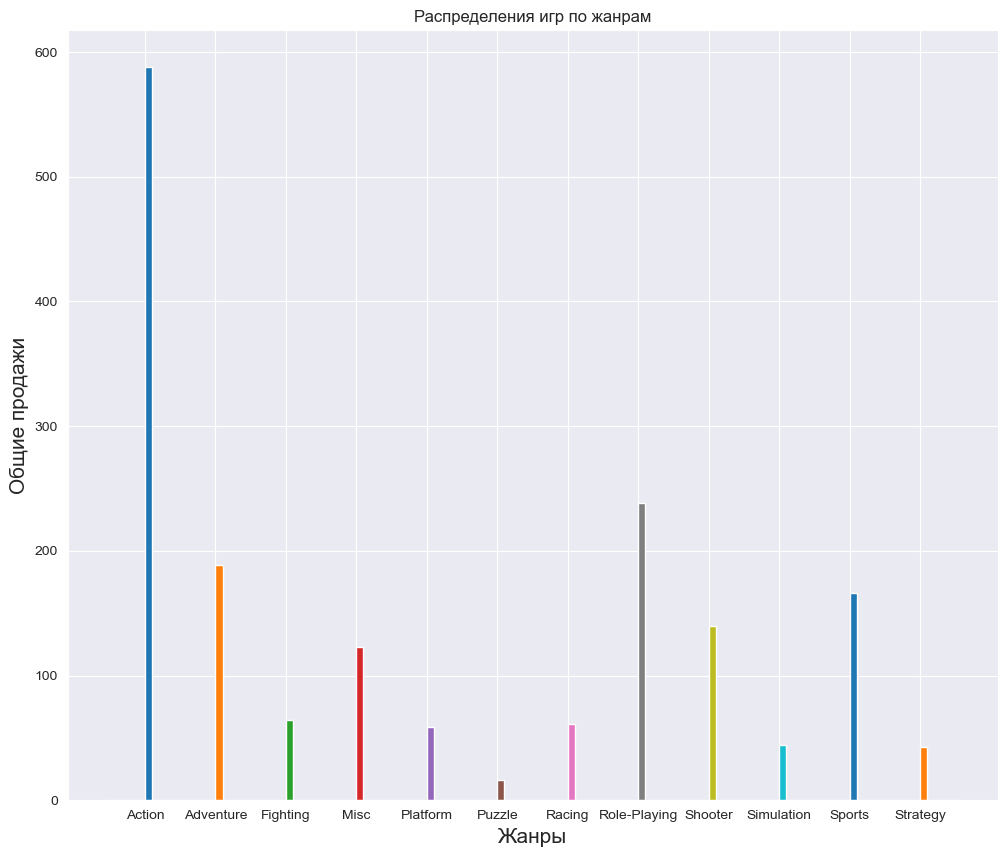

In [38]:
#строю график распределения игр по жданрам
sns.set_style('darkgrid')
plt.title('Распределения игр по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Общие продажи')
data_actual_period.groupby('genre')['genre'].hist(figsize=(12, 10));

,Жанры,Общее количество продаж
0,Action,291.76
1,Adventure,19.82
2,Fighting,30.84
3,Misc,60.22
4,Platform,39.40
5,Puzzle,3.16
6,Racing,37.10
7,Role-Playing,127.71
8,Shooter,194.76
9,Simulation,19.87


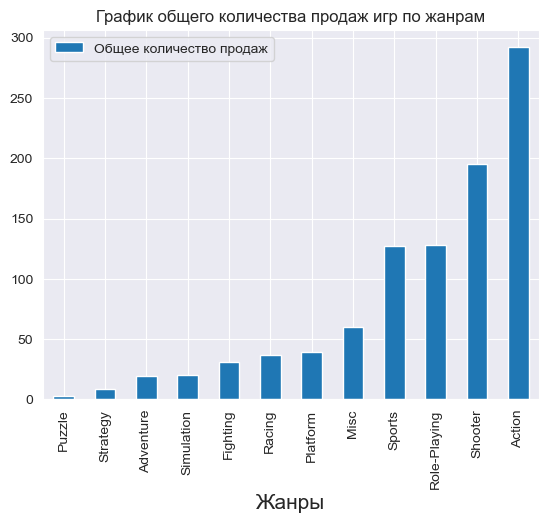

In [39]:
# создаю таблицу и строю график общего количества продаж игр по жанрам
data_actual_period_pivot_sum = data_actual_period.pivot_table(index='genre', 
                                                              values='total_sales', 
                                                              aggfunc='sum'
                                                             )
data_actual_period_pivot_sum = data_actual_period_pivot_sum.reset_index()
data_actual_period_pivot_sum.columns = ['Жанры', 
                                        'Общее количество продаж'
                                       ]
display(data_actual_period_pivot_sum)
data_actual_period_pivot_sum.sort_values('Общее количество продаж').plot(x='Жанры', 
                                                                         kind='bar', 
                                                                         title='График общего количества продаж игр по жанрам'
                                                                        );

,Жанры,Медиана продаж
0,Action,0.130
1,Adventure,0.030
2,Fighting,0.130
3,Misc,0.170
4,Platform,0.310
5,Puzzle,0.065
6,Racing,0.220
7,Role-Playing,0.130
8,Shooter,0.585
9,Simulation,0.135


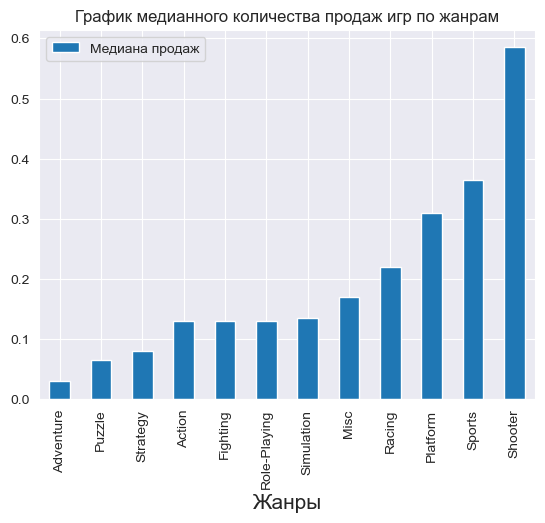

In [40]:
# создаю таблицу и строю график медианного количества продаж игр по жанрам
data_actual_period_pivot_median = data_actual_period.pivot_table(index='genre', 
                                                                 values='total_sales', 
                                                                 aggfunc='median'
                                                                )
data_actual_period_pivot_median = data_actual_period_pivot_median.reset_index()
data_actual_period_pivot_median.columns = ['Жанры', 
                                           'Медиана продаж'
                                          ]                                           
display(data_actual_period_pivot_median)
data_actual_period_pivot_median.sort_values('Медиана продаж').plot(x='Жанры', 
                                                                   kind='bar', 
                                                                   title='График медианного количества продаж игр по жанрам'
                                                                  );

Больше всего на рынке игр жанра `Action`, меньше всего - `Puzzle`. По продажам, благодаря своему количеству лидирует жанр `Action`, на втором месте `Shooter`. Но более прибыльные игры в жанре `Shooter`(согласно медиане), самые дешевые в `Adventure`. А вот `Action` расположился аж 4-м с конца по прибыльности.

**Итоги исследовательского анализа**
После проведенного анализа видно, что заметный рост продаж игр начался с 1995-1996 годов, пик этих продаж пришелся на 2008-2009 года. Новая виток продаж начасля с 2013 года, им же определяется начало актуального периода для исследования. Жизненный цикл платформ 6-11 лет. Для актуального периода был взят отрезок 2013-2015 гг. связан с началом нового роста продаж игр. 

В актуальный период самыми прибыльными и с наиболим потенциалом для роста являются платформы `PS4` и `XOne`, с которым связане новый виток роста продаж игр. Для них характерна зависимость продаж от отзывов критиков. Отзывы пользователей оказывают лишь незначительное влияние. Наибольшее количество игр представлено в жанре `Action`, но самым прибыльным является жанр `Shooter`.

## 4. Составьте портрет пользователя каждого региона

### 4.1. Топ-5 платформ для жителей регионов

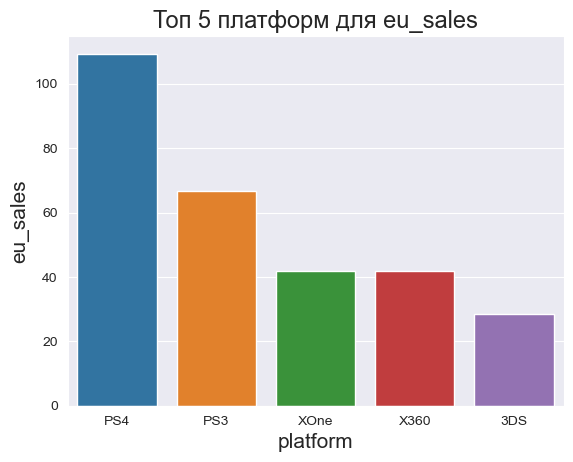

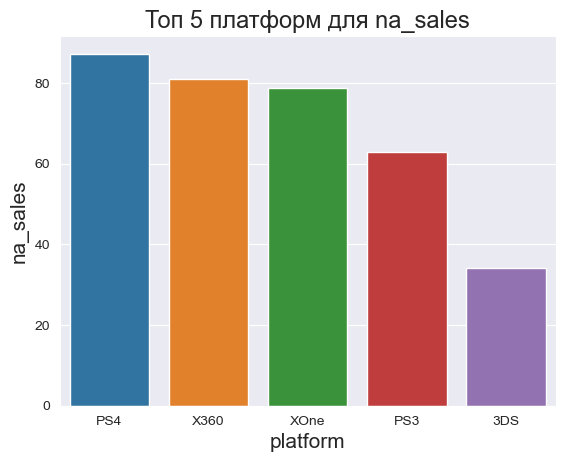

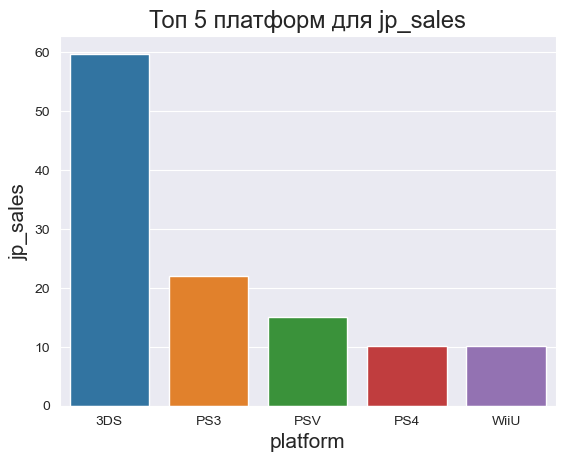

In [41]:
# составляю графики топ-5 платформ для жителей регионов NA, EU, JP
for sales in ['eu_sales', 
              'na_sales', 
              'jp_sales'
             ]:
    top_five = data_actual_period.pivot_table(index='platform', 
                                              values=sales, 
                                              aggfunc='sum'
                                             )
    top_five = top_five.reset_index()
    top_five.columns = ['platform', sales]
    top_five = top_five.sort_values(sales, ascending=False).head()
    fig.tight_layout()
    plt.title('Топ 5 платформ для ' + sales, fontsize=17)
    sns.barplot(x='platform', 
                y=sales, 
                data=top_five
               );
    plt.show()

- для Европы самой популярной платформой является `PS4`, следом идет ее предшественница `PS3`
- для Северной Америки популярность почти равномерно распределна между `PS4`, `PS3`, `X360` и `XOne`
- для Японии самой попурной платформой является `3DS`. Ничего удивительного, т.к. это приставка японского производства.

### 4.2. Топ-5 жанров для жителей регионов

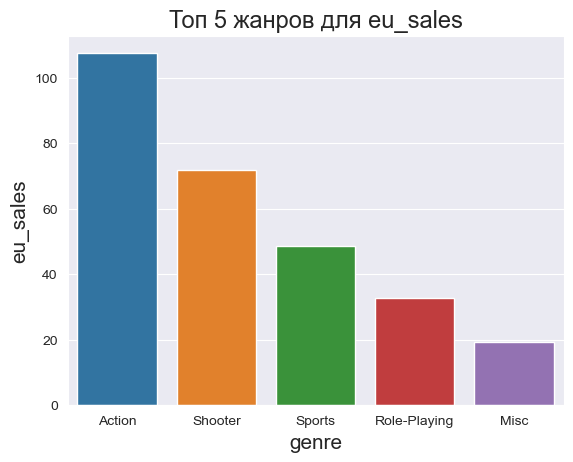

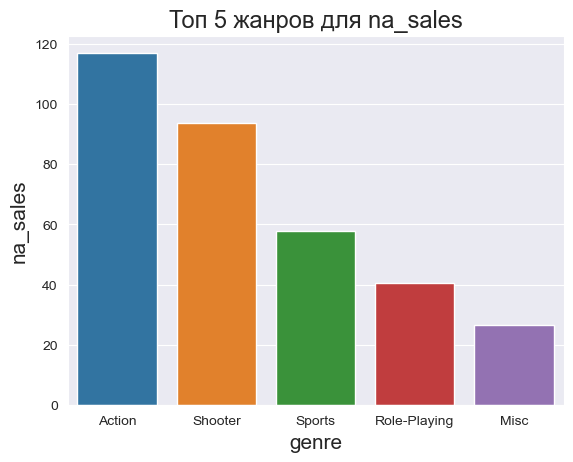

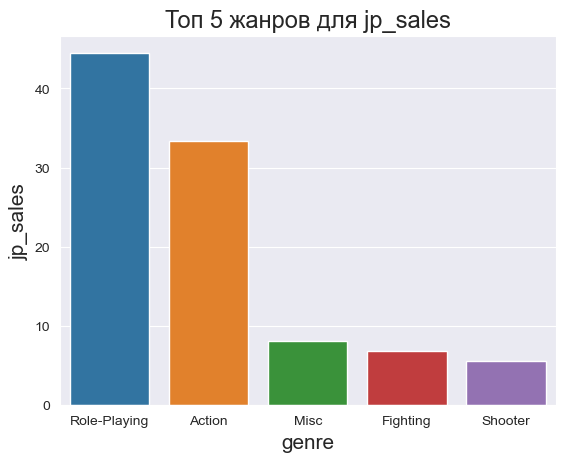

In [42]:
# составляю графики топ-5 жанров для жителей регионов NA, EU, JP
for sales in ['eu_sales', 
              'na_sales', 
              'jp_sales'
             ]:
    top_five = data_actual_period.pivot_table(index='genre', 
                                              values=sales, 
                                              aggfunc='sum'
                                             )
    top_five = top_five.reset_index()
    top_five.columns = ['genre', sales]
    top_five = top_five.sort_values(sales, ascending=False).head()
    fig.tight_layout()
    plt.title('Топ 5 жанров для ' + sales, fontsize=17)
    sns.barplot(x='genre', 
                y=sales, 
                data=top_five
               );
    plt.show()

- для Европы самый популярный жанр `Action`
- для Северной Америки самый популярный тоже `Action`, но от него ненамного отстал `Shooter`
- из-за местных особенностей, в Японии самый популярный жанр `Role-Playing`

### 4.3. Влияние рейтинга ESRB на продажи в отдельном регионе

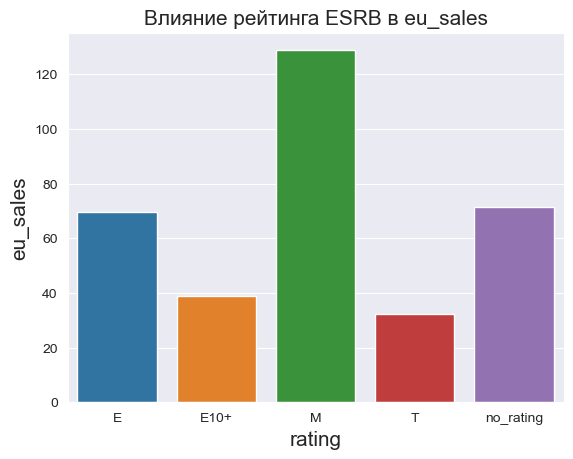

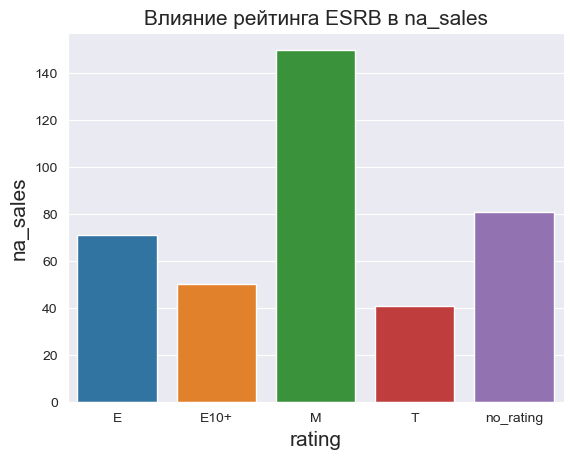

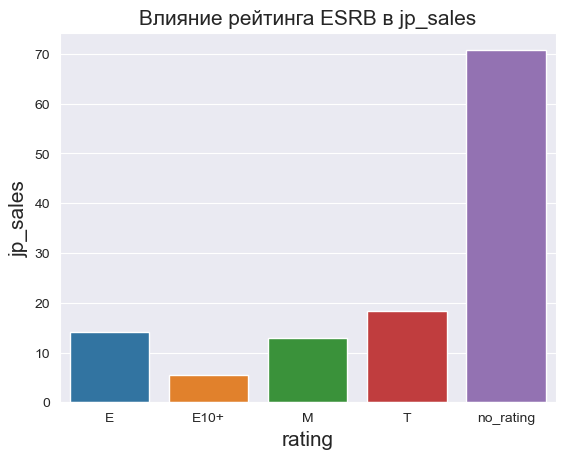

In [43]:
# составляю графики рейтингов для жителей регионов NA, EU, JP
for sales in ['eu_sales', 
              'na_sales', 
              'jp_sales'
             ]:
    esrb_sales = data_actual_period.pivot_table(index='rating', 
                                                values=sales, 
                                                aggfunc='sum'
                                               )
    esrb_sales = esrb_sales.reset_index()
    esrb_sales.columns = ['rating', sales]
    plt.title('Влияние рейтинга ESRB в ' + sales, fontsize=15)
    sns.barplot(x='rating', 
                y=sales, 
                data=esrb_sales
               );
    plt.show()

- в Европе и Северной Америке больше всего продаются игры с рейтингом `M` для взрослых. Значит целевая аудитория достаточно взрослые люди
- в Японии продажи с основном игр, для которых нет рейтинга `ESRB`. Скорее всего это игры, которые выпускаются для внутреннего рынка, и не оцениваются ассоциацией.

## 5. Проверка гипотез

### 5.1. Проверка гипотезы : "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"

Гипотезы буду проверять методом для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них независимых выборок: `scipy.stats.ttest_ind (array1, array2, equal_var)`.

**Нулевая гипотеза:** "Средние пользовательские рейтинги платформ Xbox One и PC равны"

**Альтернативная гипотеза:** "Средние пользовательские рейтинги платформ Xbox One и PC различны"

Пороговое значение `alpha = 0.05`, т.к. выборка не очень большая.


In [44]:
sample_pc = data_actual_period.query('platform == "PC" and user_score != -1 and not user_score.isna()')
sample_pc = sample_pc['user_score']
sample_xone = data_actual_period.query('platform == "XOne" and user_score != -1 and not user_score.isna()')
sample_xone = sample_xone['user_score']

alpha = .05
results = st.ttest_ind(
    sample_pc, 
    sample_xone)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.2827494983260732
Не получилось отвергнуть нулевую гипотезу


Вывод: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые / Гипотеза принята

### 5.2. Проверка гипотезы: "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные"

**Нулевая гипотеза:** "Средние пользовательские рейтинги жанров Action и Sports равны"

**Альтернативная гипотеза:** "Средние пользовательские рейтинги жанров Action и Sports разные"

Пороговое значение `alpha = 0.05`, т.к. выборка не очень большая.

Установил `equal_var = False`, т.к. выборки отличаются по размеру.

In [45]:
sample_action = data_actual_period.query('genre == "Action" and user_score != -1 and not user_score.isna()')
sample_action = sample_action['user_score']
sample_shooter = data_actual_period.query('genre == "Shooter" and user_score != -1 and not user_score.isna()')
sample_shooter = sample_shooter['user_score']
alpha = .05

results = st.ttest_ind(
    sample_action, 
    sample_shooter, 
    equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 3.984368059674169e-05
Отвергаем нулевую гипотезу


Вывод: Средние пользовательские рейтинги жанров Action и Sports разные / Гипотеза принята

## 6. Общий вывод

После обработки и исследования данных выяснил, что жизненный цикл платформ составляет 6-11 лет, на основании этого и графика продаж я выделил актуальный период для анализа, он оказался в диапазоне 2013-2015 года. Данные за 2016 год неполные, и я их не стал учитывать. Этот период характерен активным ростом продаж игр на новых платформах "PS4" и "XOne", которые стали преемниками "PS3" и "X360" (тоже показывают хорошие результаты продаж). Самые прибыльные и с большим потенциалом роста платформы "PS4" и "XOne", у которых есть средняя зависимость от оценок критиков, на что стоит ориентироваться при продумывании стратегии продаж. Оценки пользователей оказывают несущественное влияние. Больше всего представлено игр в жанре "Action", самым прибыльным жанром будет "Shooter", в топ-3 так же входят игры с жанром "Sports" и "Platform".

Для создания стратегии продаж хорошо подойдет характерный портрет ползователя в зависимости от региона продаж:
- для пользователя из Европе лучше всего подойдут игры на платформе "PS4" с жанром "Action" или "Shooter" c рейтингом "М"
- пользователям из Северной Америки больше всего нравятся игры на любой платформе из "PS3", "PS4", "X360" или "XOne", в жанре "Action" или "Shooter" и так же с рейтингом "М"
- а вот пользователи из Японии, предпочитают свою платформу "3DS", игры в жанре "Role-PLaying" и с каким то своим,неопределенным ассоциацией "ESRB" рейтингом.


После проверки гипотез пришел к выводу, что при выборе наиболее потенциальной платформы между "PS4" и "XOne" ориентироваться на пользвательские оценки игр, которые выпущены к этим платформам не стоит, т.к. они приблизительно равны. Опираться на рейтинг игр на продажу по пользовательским оценкам стоит при выборе жанра игры, они разные.